# Applied Statistics Project

**Linda Grealish**

***

## Table of Contents

* [Project Specification](#project_spec)
* [Imported libraries](#imported-libraries)
 * [Description of Plant Growth dataset](#desc_dataset)

   * [Visualising the dataset](#visualise_dataset)
 * [$t$-Test](#ttest)
 
    * [What is a $t$-Test](#desc_ttest)
    * [How a $t$-test works](#ttest_works)
    * [Assumptions of a t-test](#ttest_ass)
    * [$t$-test analysis and results](#ttest_analysis)
 * [ANOVA](#anova)
 * [ANOVA vs multiple $t$-test](#anova_v_ttest)

***

## Project Specification

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

<a id="import_libraries"></a>
## Imported Libraries

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols



<a id="desc_dataset"></a>
## Description of Plant Growth dataset

The Plant Growth dataset contains the results from an expirement to compare yields (as measured by dried weight of plants) obtained under a control and two different conditions. It is a dataset in R that is often used for statistical analysis and visualisation.

The dataset contains 30 observations, with two main variables;

1. weight:  Numeric values representing the dry weight of plants

2. group:  Categorical vairable with three levels:

    * *ctrl* - control group with no treatment applied
    * *trt1* - treatment group 1
    * *trt2* - treatment group 2

In [4]:
# Define dataframe from plantgrowth.csv file

df = pd.read_csv('plantgrowth.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [5]:
# Drop column 'rownames' as they are labels and not necessary for further analysis
df.drop(columns=['rownames'], inplace=True)

df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [6]:
# Check for any null values
df.isnull().sum()


weight    0
group     0
dtype: int64

In [7]:
# Determine the number of records in each group
df['group'].value_counts()


ctrl    10
trt1    10
trt2    10
Name: group, dtype: int64

In [8]:
# Define the groups within the dataset - ctrl, trt1, trt2
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

<a id="visualise_dataset"></a>
### Visualising the dataset

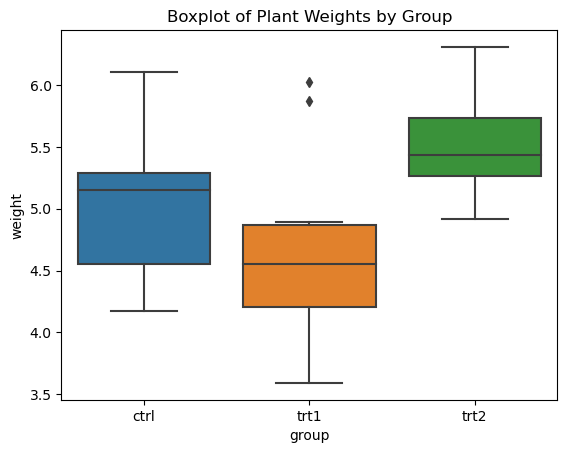

In [9]:
sns.boxplot(x='group', y='weight', data=df)
plt.title("Boxplot of Plant Weights by Group")
plt.show()

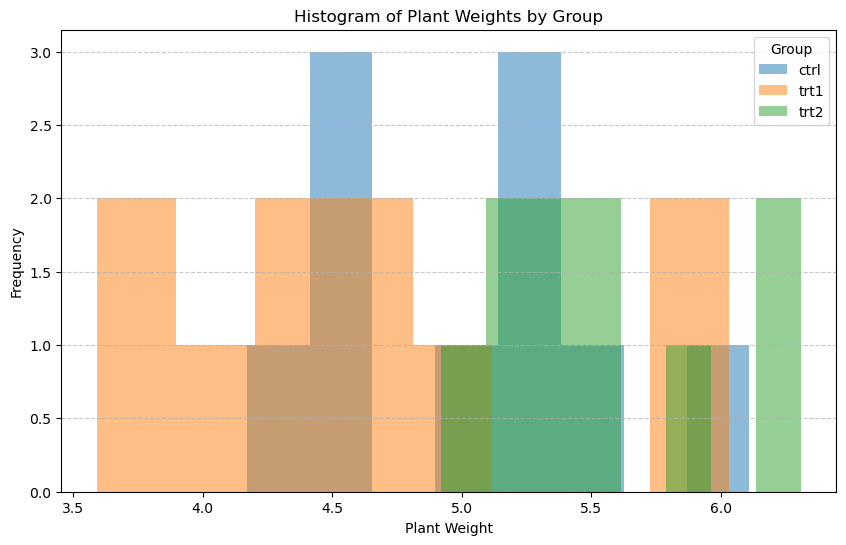

In [10]:
# Plot histograms showing plant weights by group
groups = df['group'].unique()
plt.figure(figsize=(10, 6))

for group in groups:
    group_df = df[df['group'] == group]['weight']
    plt.hist(group_df, bins=8, alpha=0.5, label=group)

# Add labels, legend, and title
plt.xlabel('Plant Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Plant Weights by Group')
plt.legend(title='Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

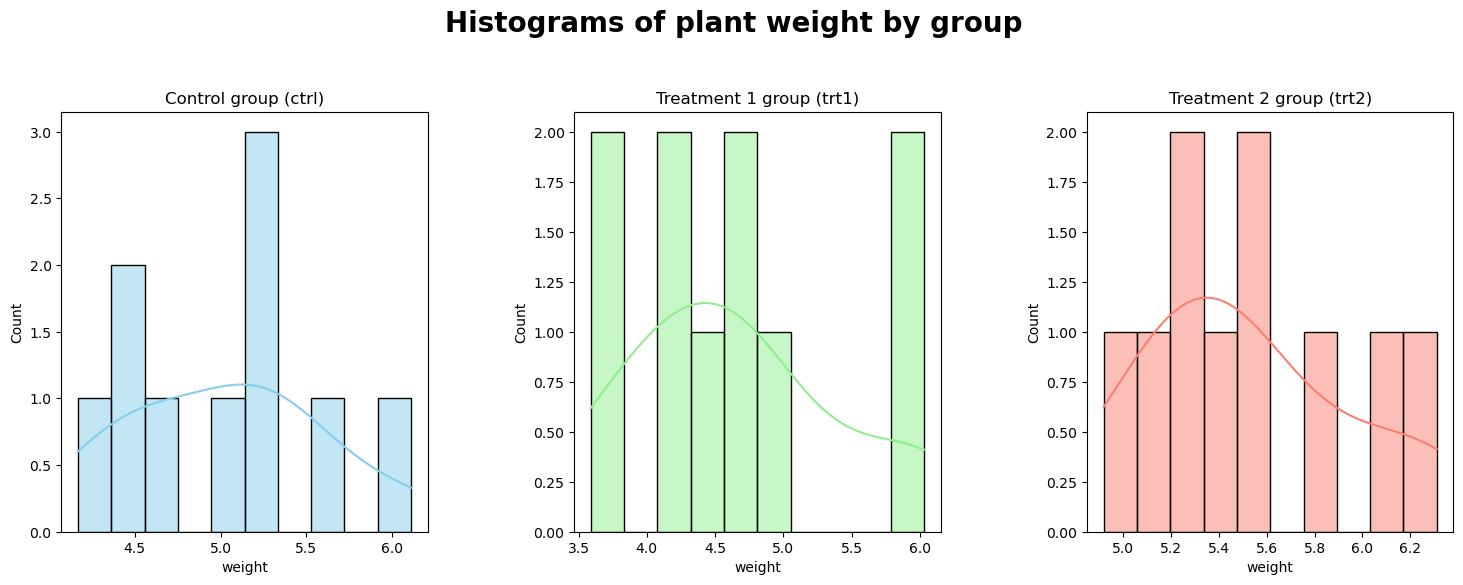

In [11]:
# Generate histograms for each seperate group
f,axes=plt.subplots(1,3, figsize=(16,6))

plt.suptitle("Histograms of plant weight by group", size=20, weight='bold', y=1.02)

sns.histplot(ctrl, kde=True, label = "Control group (ctrl)", bins=10, ax=axes[0],color = "skyblue" )
ax=axes[0].set_title("Control group (ctrl)");

sns.histplot(trt1, kde=True,  label = "Treatment 1 group", bins=10, ax=axes[1], color = "lightgreen" )
ax=axes[1].set_title("Treatment 1 group (trt1)");

sns.histplot(trt2, kde=True,   label = "Treatment 2 group (trt2)", bins=10, ax=axes[2], color = "salmon" )
ax=axes[2].set_title("Treatment 2 group (trt2)");

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.08, right=0.95, 
                    top=0.85, bottom=0.15, 
                    wspace=0.4, hspace=0.4)

plt.show()

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  The test returns a *test statistic value (W)* and a  *p-value*.  

- **Test Statistic (W)**
  
  This measures how well the sample data matches the properties of a normal distribution.  This is a value between 0 and 1, where values closer to 1 indicating that the sample most liekly follow the normal distribution.

- **p-value (p)**

  This value determines the statistical significance of the test.  
  
  A low value (*p* <0.05) suggests that the sample significantly deviates from a normal distribution and you can reject the null hypothesis.

  A high value (*p*$\geq $ 0.05) suggests that the sample does not significantly deviate from a normal distribution you cannot reject the null hypothesis.

In [12]:
# Run the Shapiro test on the control group
shapiro_test = stats.shapiro(ctrl)

print("Shapiro-Wilk Test Results for the control group:")
print(f"The test statistic (W) is {shapiro_test.statistic}")
print(f"The p-value is {shapiro_test.pvalue}")



Shapiro-Wilk Test Results for the control group:
The test statistic (W) is 0.9566815495491028
The p-value is 0.7474744915962219


In [13]:
# Run the Shapiro test on the treatment 1 group
shapiro_test = stats.shapiro(trt1)

print("Shapiro-Wilk Test Results for the treatment 1 group:")
print(f"The test statistic (W) is {shapiro_test.statistic}")
print(f"The p-value is {shapiro_test.pvalue}")



Shapiro-Wilk Test Results for the treatment 1 group:
The test statistic (W) is 0.9304108619689941
The p-value is 0.451945960521698


In [14]:
# Run the Shapiro test on the treatment 2 group
shapiro_test = stats.shapiro(trt2)

print("Shapiro-Wilk Test Results for the treatment 2 group:")
print(f"The test statistic (W) is {shapiro_test.statistic}")
print(f"The p-value is {shapiro_test.pvalue}")



Shapiro-Wilk Test Results for the treatment 2 group:
The test statistic (W) is 0.941005289554596
The p-value is 0.5642533898353577


The results of the Shapiro-Wilks test where each group has a test statistic of close to 1 and a p-value of $\geq $ 0.05 indicate that the observations in each group do not significantly deviate from a normal distribution.

<a id="ttest"></a>
# $t$-Tests

<a id="desc_ttest"></a>
### What is a $t$-test

The t-test is a statistical test procedure that tests whether there is a significant difference between the means of two groups.  It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.  There are three different types of t-tests;

- ***one sample t-test***
    
    used to investigate whether there's a difference between a group and a standard value (e.g, comparing daily temperatures against a fixed seasonal average)
- ***paired sample t-test***

    used to determine if there is a difference within a group between two points in time (e.g. reduction in patients symptoms levels before and after medical treatment, where all patients receive the same treatment)
- ***independant sample t-test***

    used to investigate whether there's a significant difference between two independant groups (e.g. reduction in patients symptoms levels before and after medical treatment, where one group receive medicine and the other group a placebo)

<a id="ttest_works"></a>
### How a t-test works

<a id="ttest_ass"></a>
### Assumptions of a t-test

1. Continous data
2. The sample data have been randomly sampled from a population
3. There is homogeneity of variance (variability of the data in each group is similar)
4. The distribution of the data is approximately normal


<a id="ttest_analysis"></a>
### $t$-test analysis and results

As we are analysing the observations from two treatment groups to determine if there is a significant difference between their mean, tI will us an independant sample t-test.

In [15]:
# Perform an independant  t-test using scipy.stats
t_stat, p_value = stats.ttest_ind(trt1, trt2, equal_var=True)

print(f"\nT-test results between 'trt1' and 'trt2':\nT-statistic: {t_stat:.4f} \nP-value: {p_value:.4f}")


T-test results between 'trt1' and 'trt2':
T-statistic: -3.0101 
P-value: 0.0075


Assuming a typical significance level of 0.05, the t-statistic of -3.0101 and the p-value of 0.0075 indicate that the null hypothesis can be rejected and there is a significant difference between the yield of treatment gtoup 1 and treatment group 2.

<a id="anova"></a>
# ANOVA

In [18]:
# # Perform a one-way ANOVA using scipy.stats
f_stat, p_val = stats.f_oneway(ctrl, trt1, trt2)

print(f"\nANOVA results:\nf-statistic: {f_stat:.4f}\np-value: {p_val:.4f}")




ANOVA results:
f-statistic: 4.8461
p-value: 0.0159


# References

https://www.scribd.com/document/420199566/Introduction-to-Statistical-Modelling-pdf

https://www.scribbr.com/statistics/t-test/

https://en.wikipedia.org/wiki/Student%27s_t-test

https://datatab.net/tutorial/t-test

https://libguides.library.kent.edu/spss/independentttest#:~:text=The%20Independent%20Samples%20t%20Test%20compares%20the%20means%20of%20two,Independent%20t%20Test

https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html

https://www.scribbr.com/statistics/one-way-anova/#:~:text=ANOVA%2C%20which%20stands%20for%20Analysis,ANOVA%20uses%20two%20independent%20variables

https://datatab.net/tutorial/anova

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


